## Assignment 03: Sleeping habits

As a data scientist you will work with ordinal or categorical data as well. What are good methods to visualize such data? What are proper statistics to use? What needs to be done in the data preparation steps to conduct certain analysis. During this week we will work with data from a sleeping study. This dataset is not mandatory. You are encouraged to use data from your project when possible. It is also able to use an interesting source from the internet, as long as no notebooks are copied withouth reference. 

Keywords: statistics, categorical data, ordinal data, survey-based study of the sleeping, exploratory data analysis, normalization, hypothesis testing, p-value


More to read:
- https://fennaf.gitbook.io/bfvm22prog1/

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
There are a number of cheatsheets and tutorials on the internet. The next overview is a compact overview of tutorials
- https://www.kaggle.com/hamelg/python-for-data-21-descriptive-statistics
- https://www.kaggle.com/hamelg/python-for-data-22-probability-distributions
- https://www.kaggle.com/hamelg/python-for-data-23-confidence-intervals
- https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing
- https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests
- https://www.kaggle.com/hamelg/python-for-data-26-anova/notebook
- https://www.kaggle.com/hamelg/python-for-data-27-linear-regression


You will learn about analysing data with pandas and numpy and you will learn to visualize with bokeh. Concretely, you will preprocess the Sleep Study data in an appropiate format in order to conduct statistical and visual analysis. 

Learning objectives
- Conduct exploratory data analysis for categarical data
- Provide statistical evidence of factor effect
- Maintain development environment 
- Apply coding standards and FAIR principles

Please add topics you want to learn here: <padlet>


## About the data

The data is collected from a survey-based study of the sleeping habits of individuals within the US. 

Below is a description of each of the variables contained within the dataset.

- Enough = Do you think that you get enough sleep?
- Hours = On average, how many hours of sleep do you get on a weeknight?
- PhoneReach = Do you sleep with your phone within arms reach?
- PhoneTime = Do you use your phone within 30 minutes of falling asleep?
- Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
- Breakfast = Do you typically eat breakfast?

The two research questions you should answer in this assignment are:
1. Is there a differences in Hours sleep caused by having breakfast (yes, no)?
2. Is there a differences in Hours sleep caused by having breakfast and the tireness (score)


The assignment consists of 6 parts:

- [part 1: load the data](#0)
- [part 2: data inspection](#1)
- [part 3: check assumptions](#2)
   - [check normality 3.1](#ex-31)
   - [check equal variance 3.2](#ex-32)
- [part 4: prepare the data](#3)
- [part 5: answer the research question](#4)
- [part 6: enhanced plotting](#5)

Part 1 till 5 are mandatory, part 6 is optional (bonus)
Mind you that you cannot copy code without referencing the code. If you copy code you need to be able to explain your code verbally and you will not get the full score. 


**NOTE If your project data is suitable you can use that data instead of the given data**

## ANOVA

Analysis of variance (ANOVA) compares the variances between groups versus within groups. It basically determines whether the differences between groups is larger than the differences within a group (the noise). 
A graph picturing this is as follow: https://link.springer.com/article/10.1007/s00424-019-02300-4/figures/2


In ANOVA, the dependent variable must be a continuous (interval or ratio) level of measurement. For instance Glucose level. The independent variables in ANOVA must be categorical (nominal or ordinal) variables. For instance trial category, time of day (AM versus PM) or time of trial (different categories). Like the t-test, ANOVA is also a parametric test and has some assumptions. ANOVA assumes that the data is normally distributed.  The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal. ANOVA also assumes that the observations are independent of each other. 

A one-way ANOVA has just one independent variable. A two-way ANOVA (are also called factorial ANOVA) refers to an ANOVA using two independent variables. For research question 1 we can use the one-way ANOVA, for research question two we can use two-way ANOVA. But first we need to check the assumptions. 

If your data is not normally distributed you might want to look for an alternative. See also https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/parametric-and-non-parametric-data/


---

## Deliver organised solution

Challenge yourself. Can you create a dashboard for the final analysis and deliver the code in  python files instead of notebooks?

<a name='0'></a>
## Part 1: Load the data (10 pt)

load the `sleep.csv` data. 
Preferably we read the data not with a hard coded data path but using a config file. See https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml. Get yourself familiar with the data. Answer the following questions.

1. What is the percentage missing data?
2. Considering the research question, what is the dependent variable and what are the indepent variables? Are they of the correct datatype? 

In [1]:
#code printing percentage missing data

#import libraries
import yaml
import pandas as pd
import numpy as np

#yaml part to config data
def get_config():
    with open("config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config
    
config = get_config()

#read data and make table
sleep = pd.read_csv(config['sleep'])

#calculating the percentage of missing data in every column of the dataset
sleep_null_percentage = sleep.isna().mean() * 100


#calculating the percentage of missing data in the dataset
total_cells = np.product(sleep.shape)
total_missing = sleep.isnull().sum().sum()
percentage_missing = (total_missing / total_cells) * 100

# displaying the percentage of missing data
percentage_missing, sleep_null_percentage



(0.3205128205128205,
 Enough        0.000000
 Hours         1.923077
 PhoneReach    0.000000
 PhoneTime     0.000000
 Tired         0.000000
 Breakfast     0.000000
 dtype: float64)

In [2]:
#code printing answer dependent and independent variables

sleep_cleaned = sleep.replace({'Yes': '1', 'No': '0'})
sleep_cleaned = sleep_cleaned.dropna()
sleep_correlation = sleep_cleaned[['Enough', 'Hours', 'PhoneReach', 'PhoneTime', 'Tired', 'Breakfast']].corr()

sleep_correlation

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
Enough,1.000000,0.380740,-0.061183,-0.025481,-0.410416,0.129246
Hours,0.380740,1.000000,-0.054957,0.151378,-0.191913,0.225818
PhoneReach,-0.061183,-0.054957,1.000000,0.176592,-0.089936,-0.237404
PhoneTime,-0.025481,0.151378,0.176592,1.000000,-0.032974,0.018631
Tired,-0.410416,-0.191913,-0.089936,-0.032974,1.000000,-0.244963
Breakfast,0.129246,0.225818,-0.237404,0.018631,-0.244963,1.000000


In [3]:
# 'Hours' is dependent variable and 'Tired' and 'Beakfast' are independent variables

In [4]:
#code printing answer about datatypes

print(sleep.Enough.dtype)
print(sleep.Hours.dtype)
print(sleep.PhoneReach.dtype)
print(sleep.PhoneTime.dtype)
print(sleep.Tired.dtype)
print(sleep.Breakfast.dtype)



object
float64
object
object
int64
object


In [5]:
#'Hours' is a continuous variable and is of the correct datatype (float64).
#'Tired' is a categorical variable on a scale from 1 to 5. It is correctly stored as an integer (int64).
#This is a categorical variable and is correctly represented as an object type.

---

<a name='1'></a>
## Part 2: Inspect the data (30 pt)

Inspect the data practically. Get an idea about how well the variable categories are ballanced. Are the values of a variable equally divided? What is the mean value of the dependent variable? Are there correlations amongs the variables?


<ul>
<li>Create some meaninful overviews such as variable value counts</li>
<li>Create a scatter plot ploting the relation between being tired and hours of sleep with different colors for Breakfast</li>
    <li>Print some basic statistics about the target (mean, standard deviation)</li>
    <li>Create a heatmap to check for correlations among variables. </li>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>the gitbook has a bokeh heatmap example</li></ul>
</details>
</ul>

In [6]:
#code your answer to the value counts and distribution plots here
value_counts = {column: sleep_cleaned[column].value_counts() for column in sleep.columns}
print(value_counts)

{'Enough': Enough
0    67
1    35
Name: count, dtype: int64, 'Hours': Hours
7.0     35
6.0     24
8.0     16
5.0     12
9.0      8
4.0      4
2.0      2
10.0     1
Name: count, dtype: int64, 'PhoneReach': PhoneReach
1    71
0    31
Name: count, dtype: int64, 'PhoneTime': PhoneTime
1    83
0    19
Name: count, dtype: int64, 'Tired': Tired
3    39
2    26
4    23
5    10
1     4
Name: count, dtype: int64, 'Breakfast': Breakfast
1    61
0    41
Name: count, dtype: int64}


In [7]:
#code for the scatter plot here

from bokeh.io import output_file, show
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

output_notebook()

from bokeh.models import ColumnDataSource
from bokeh.palettes import HighContrast3
from bokeh.transform import factor_cmap, factor_mark

def plot_df(data, x='Hours', y='Tired'):
    p = figure(title='ask me later', y_axis_label=f'{y}', x_axis_label=f'{x}', toolbar_location=None)
    

    breakfastt = sorted(data.Breakfast.unique())
    markers = ['hex', 'square']
    
    # Adding scatter plot 
    p.scatter(x=x, 
              y=y,
              source=data,
              marker=factor_mark('Breakfast', markers, breakfastt),
              color=factor_cmap('Breakfast', 'HighContrast3', breakfastt),
              legend_field='Breakfast',
              fill_alpha=0.6,
              size=10)
    
    # Displaying the plot with legend
    p.legend.location = 'bottom_left'
    p.legend.title = 'Breakfast YES(1) No(0)'

    show(p)


plot_df(sleep_cleaned)




Loading BokehJS ...

In [8]:
#code your answer to the target statistics here


#It seems that eating breakfast is associated with increased hours of sleep. It also appears that increased tiredness leads to increased hours of sleep.

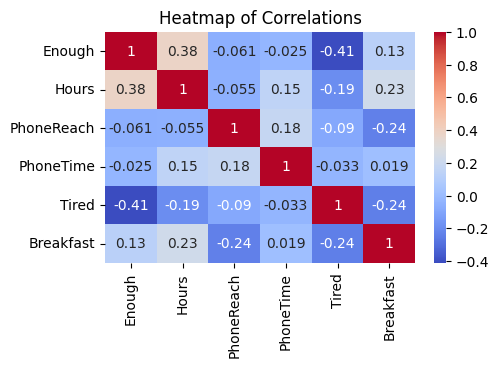

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(sleep_correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

In [10]:
#code your answer for the heatmap here and briefly state your finding

''' The highest correlations:


Hours - Breakfast         23 
Hours - Tired             19   
        
It seems there is a significant relationship between eating breakfast and being tired on the one hand and sleeping hours on the other hand.

'''

' The highest correlations:\n\n\nHours - Breakfast         23 \nHours - Tired             19   \n        \nIt seems there is a significant relationship between eating breakfast and being tired on the one hand and sleeping hours on the other hand.\n\n'

---

<a name='2'></a>
## Part 3: Check Assumptions

Before we answer the research question with ANOVA we need to check the following assumptions:

1. ANOVA assumes that the dependent variable is normaly distributed
2. ANOVA also assumes homogeneity of variance
3. ANOVA also assumes that the observations are independent of each other. Most of the time we need domain knowledge and experiment setup descriptions to estimate this assumption

We are going to do this graphically and statistically. 

<a name='ex-31'></a>
### Check normality (10 pt)

<ul><li>
Plot the distribution of the dependent variable. Add a vertical line at the position of the average. Add a vertical line for the robuust estimation. Add the normal distribution line to the plot. Comment on the normallity of the data. Do you want the full points? Plot with bokeh!</li>

<li>Use a Shapiro-Wilk Test or an Anderson-Darling test to check statistically</li></ul>


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>check the code of lesson 1 DS1 bayesian statistics</li>
        <li>heart_failure case of gitbook uses bokeh histograms</li>
</ul>
</details>

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import norm, shapiro, anderson
from bokeh.plotting import figure, output_file, show
from bokeh.models import Span, Label
from bokeh.io import export_png

variable = 'Hours'
y = sleep_cleaned[variable]
# Calculating mu and sigma
mu_MM = np.mean(y)
sigma2_MM = np.var(y)
sigma_MM = np.sqrt(sigma2_MM)
mu_R = np.median(y)
# Printing the calculated values
print('mu.MM = {:.2f}, sigma2.MM = {:.3f}'.format(mu_MM, sigma2_MM))

# Creating the distribution
x = np.linspace(0, 15, 201)
rv_MM = np.array([norm.pdf(xi, loc=mu_MM, scale=sigma_MM) for xi in x])
rv_R = np.array([norm.pdf(xi, loc=mu_R, scale=sigma_MM) for xi in x])

# Creating a histogram and a line plot with Bokeh
p = figure(title="Histogram of Sleeping Hours", x_axis_label='Sleeping Hours', y_axis_label='Probability Density')
p.quad(top=np.histogram(y, bins=np.arange(0, 16, 1), density=True)[0], bottom=0, left=np.arange(0, 15, 1),
       right=np.arange(1, 16, 1), fill_color="darkgrey", line_color="white", alpha=1, legend_label= "Experimental")
p.line(x, rv_MM, line_color="red", legend_label="Normal distribution - MM")
p.line(x, rv_R, line_color="blue", legend_label="Normal distribution - Robust")

# Adding a vertical line for mu_MM
p.line([mu_MM, mu_MM], [0, 0.4], line_width=2, color='red', line_dash='dashed', legend_label="Average")

p.line([mu_R, mu_R], [0, 0.4], line_width=2, color='blue', line_dash='dashed',  legend_label="Median")


# Adding legend
p.legend.location = "top_right"

# Display plot
show(p)

# Conducting Shapiro-Wilk and Anderson-Darling tests
shapiro_test = shapiro(y)
anderson_test = anderson(y)

shapiro_test, anderson_test


mu.MM = 6.66, sigma2.MM = 1.990


(ShapiroResult(statistic=0.93398118019104, pvalue=7.15833084541373e-05),
 AndersonResult(statistic=2.6698909471921723, critical_values=array([0.556, 0.633, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=6.6568627450980395, scale=1.4176755346582757)
  success: True
  message: '`anderson` successfully fit the distribution to the data.'))

In [12]:
# briefly summarize your findings

#in shapiro result the p-value is very low, suggesting that the data does not follow a normal distribution.
#in anderson result the statistic value is more than all critical value that also shows the data does not follow a normal distribution.

<a name='ex-32'></a>
### Check homogeneity of variance (20 pt)

<ul><li>
Use boxplots for the check of homoegeneity of variance. Do you want the full points? Plot with bokeh!</li>

<li>Use a Levene’s & Bartlett’s Test of Equality (Homogeneity) of Variance to test equal variance statistically</li><ul>

In [13]:

import hvplot.pandas

boxplot = sleep_cleaned.hvplot.box(y='Hours', by=['Breakfast','Tired'], 
                          color='sex',
                          box_alpha = 0.7,
                          legend = False,
                          cmap = ['magenta', 'lime'])
boxplot

:BoxWhisker   [Breakfast,Tired]   (Hours)

In [19]:
# your code for the statistical test here
import scipy.stats as stats
levene_stat, levene_p = stats.levene(sleep_cleaned['Hours'], sleep_cleaned['Tired'])
print("Levene's Test statistic:", levene_stat)
print("Levene's Test p-value:", levene_p)


bartlett_stat, bartlett_p = stats.bartlett(sleep_cleaned['Hours'], sleep_cleaned['Tired'])
print("Bartlett's Test statistic:", bartlett_stat)
print("Bartlett's Test p-value:", bartlett_p)

Levene's Test statistic: 5.048068341195966
Levene's Test p-value: 0.02573520664257065
Bartlett's Test statistic: 10.970029497923818
Bartlett's Test p-value: 0.0009259728635519532


In [15]:
# briefly summarize your findings

#A p-value less than 0.05 suggests that the differences in variances are statistically significant.
# This could impact analyses that assume equal variances like a standard ANOVA

---

<a name='3'></a>
## Part 4: Prepare your data (10 pt)

Create a dataframe with equal samplesize. Make three categories for tireness 1-2 = no, 3 = maybe, 4-5 = yes

In [21]:
#your solution here

# Recategorizing the 'Tired' variable into three categories: 'No', 'Maybe', 'Yes'
sleep_cleaned['Tired_Cat'] = pd.cut(sleep_cleaned['Tired'], bins=[0, 2, 3, 5], right=True, labels=["No", "Maybe", "Yes"])

# Checking the distribution of the new categories
tired_category_distribution = sleep_cleaned['Tired_Cat'].value_counts()
tired_category_distribution

Tired_Cat
Maybe    39
Yes      33
No       30
Name: count, dtype: int64

---

<a name='4'></a>
## Part 5: Answer the research questions (20 pt)

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>use one-way ANOVA for research question 1</li>
    <li>Use two-way ANOVA for research question 2</li>
    <li>https://reneshbedre.github.io/blog/anova.html</li>
</ul>
</details>

In [25]:
#Your solution here

from scipy.stats import f_oneway

# Split the data into groups
group_breakfast_yes = sleep_cleaned[sleep_cleaned['Breakfast'] == '1']['Hours']
group_breakfast_no = sleep_cleaned[sleep_cleaned['Breakfast'] == '0']['Hours']

# Perform one-way ANOVA
anova_result_1 = f_oneway(group_breakfast_yes, group_breakfast_no)
print(anova_result_1)


F_onewayResult(statistic=5.373395129030667, pvalue=0.022483055685484005)


---

<a name='5'></a>
## Part 6: Enhanced plotting (20 pt)

Create a panel with 1) your dataframe with equal samplesize 2) a picture of a sleeping beauty, 3) the scatter plot of tired / hours of sleep with different colors for Breakfast from part 2 4) the boxplots given the p-value for the anova outcome in the title

In [18]:
#your solution here